In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# store sales Forecasting

The project includes the following:-
    
    1. DATA PREPARATION

        merging of data
        extracting date information
        columns information
        missing values

    2. EXPLORATORY DATA ANALYSIS

        popularity of store types
        average sales-store types
        average monthly sales-per year
        average weekly sales-per year
        average store sales
        holidays v/s non holiday sales
        Relationship: Week of Year vs Sales
        Relationship: Size of Store vs Sales
        Relationship: Temperature vs Sales
        Relationship: Fuel Price vs Sales
        Relationship: CPI vs Sales
        Relationship: Unemployment vs Sales
        Correlation Matrix

    3. DATA PREPARATION FOR MODEL TRAINING
    4. MACHINE LEARNING

        Linear Regression
        Gradient boosting Machine
        Model comparison
        Making Predictions

    5. INFERENCES AND CONCLUSIONS

In [2]:
import plotly.express as px

# 1. DATA PREPARATION

The dataset contain the three files in the csv format:

sales.csv = this file has 421570 rows and 5 columns. The columns contain the information for a store, department, date, weekly sales and whether a particular week is a holiday week or not

stores.csv : this file has 45 rows and 3 columns. The columns correpond to the stores, their type and sizes of stores

features.csv: this file 8190 rows and 12 columns. This file again has some further information regarding the stores and the region in which a particular store is located. It has date, temperature, fuel price, consumer price index, unemployment rate information for the region in which a particular store is located.It also has 5 columns MarkDown1-5 which corresponds to some promotional activities going on in different stores.

In [3]:
sales = pd.read_csv("D:\dataset\sales data-set.csv")
stores = pd.read_csv("D:\dataset\stores data-set.csv")
features = pd.read_csv("D:\dataset\Features data set.csv")

In [4]:
sales

Store  Dept        Date  Weekly_Sales  IsHoliday
0           1     1  05/02/2010      24924.50      False
1           1     1  12/02/2010      46039.49       True
2           1     1  19/02/2010      41595.55      False
3           1     1  26/02/2010      19403.54      False
4           1     1  05/03/2010      21827.90      False
...       ...   ...         ...           ...        ...
421565     45    98  28/09/2012        508.37      False
421566     45    98  05/10/2012        628.10      False
421567     45    98  12/10/2012       1061.02      False
421568     45    98  19/10/2012        760.01      False
421569     45    98  26/10/2012       1076.80      False

[421570 rows x 5 columns]

In [5]:
stores

Store Type    Size
0       1    A  151315
1       2    A  202307
2       3    B   37392
3       4    A  205863
4       5    B   34875
5       6    A  202505
6       7    B   70713
7       8    A  155078
8       9    B  125833
9      10    B  126512
10     11    A  207499
11     12    B  112238
12     13    A  219622
13     14    A  200898
14     15    B  123737
15     16    B   57197
16     17    B   93188
17     18    B  120653
18     19    A  203819
19     20    A  203742
20     21    B  140167
21     22    B  119557
22     23    B  114533
23     24    A  203819
24     25    B  128107
25     26    A  152513
26     27    A  204184
27     28    A  206302
28     29    B   93638
29     30    C   42988
30     31    A  203750
31     32    A  203007
32     33    A   39690
33     34    A  158114
34     35    B  103681
35     36    A   39910
36     37    C   39910
37     38    C   39690
38     39    A  184109
39     40    A  155083
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221

In [6]:
features

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]

# Merging of data

Let's merge the data from 3 dataframes into a single dataframe and proceed further with a one dataframe

In [7]:
merged = sales.merge(stores, how='left').merge(features, how='left')
merged

Store  Dept        Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1  05/02/2010      24924.50      False    A  151315   
1           1     1  12/02/2010      46039.49       True    A  151315   
2           1     1  19/02/2010      41595.55      False    A  151315   
3           1     1  26/02/2010      19403.54      False    A  151315   
4           1     1  05/03/2010      21827.90      False    A  151315   
...       ...   ...         ...           ...        ...  ...     ...   
421565     45    98  28/09/2012        508.37      False    B  118221   
421566     45    98  05/10/2012        628.10      False    B  118221   
421567     45    98  12/10/2012       1061.02      False    B  118221   
421568     45    98  19/10/2012        760.01      False    B  118221   
421569     45    98  26/10/2012       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             38.51       2.548        NaN        NaN        NaN        NaN   
2             39.93       2.514        NaN        NaN        NaN        NaN   
3             46.63       2.561        NaN        NaN        NaN        NaN   
4             46.50       2.625        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        64.88       3.997    4556.61      20.64       1.50    1601.01   
421566        64.89       3.985    5046.74        NaN      18.82    2253.43   
421567        54.47       4.000    1956.28        NaN       7.89     599.32   
421568        56.47       3.969    2004.02        NaN       3.18     437.73   
421569        58.85       3.882    4018.91      58.08     100.00     211.94   

        MarkDown5         CPI  Unemployment  
0             NaN  211.096358         8.106  
1             NaN  211.242170         8.106  
2             NaN  211.289143         8.106  
3             NaN  211.319643         8.106  
4             NaN  211.350143         8.106  
...           ...         ...           ...  
421565    3288.25  192.013558         8.684  
421566    2340.01  192.170412         8.667  
421567    3990.54  192.327265         8.667  
421568    1537.49  192.330854         8.667  
421569     858.33  192.308899         8.667  

[421570 rows x 16 columns]

# Extracting data information

The sales are given for Years 2010-2012 on weekly basis. So let's split the date column to extract information for year, month and week

In [8]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week)*1.0

split_date(merged)
 

In [9]:
merged

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-05-02      24924.50      False    A  151315   
1           1     1 2010-12-02      46039.49       True    A  151315   
2           1     1 2010-02-19      41595.55      False    A  151315   
3           1     1 2010-02-26      19403.54      False    A  151315   
4           1     1 2010-05-03      21827.90      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    98 2012-09-28        508.37      False    B  118221   
421566     45    98 2012-05-10        628.10      False    B  118221   
421567     45    98 2012-12-10       1061.02      False    B  118221   
421568     45    98 2012-10-19        760.01      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN        NaN        NaN        NaN   
1             38.51       2.548        NaN        NaN        NaN        NaN   
2             39.93       2.514        NaN        NaN        NaN        NaN   
3             46.63       2.561        NaN        NaN        NaN        NaN   
4             46.50       2.625        NaN        NaN        NaN        NaN   
...             ...         ...        ...        ...        ...        ...   
421565        64.88       3.997    4556.61      20.64       1.50    1601.01   
421566        64.89       3.985    5046.74        NaN      18.82    2253.43   
421567        54.47       4.000    1956.28        NaN       7.89     599.32   
421568        56.47       3.969    2004.02        NaN       3.18     437.73   
421569        58.85       3.882    4018.91      58.08     100.00     211.94   

        MarkDown5         CPI  Unemployment  Year  Month  Day  WeekOfYear  
0             NaN  211.096358         8.106  2010      5    2        17.0  
1             NaN  211.242170         8.106  2010     12    2        48.0  
2             NaN  211.289143         8.106  2010      2   19         7.0  
3             NaN  211.319643         8.106  2010      2   26         8.0  
4             NaN  211.350143         8.106  2010      5    3        18.0  
...           ...         ...           ...   ...    ...  ...         ...  
421565    3288.25  192.013558         8.684  2012      9   28        39.0  
421566    2340.01  192.170412         8.667  2012      5   10        19.0  
421567    3990.54  192.327265         8.667  2012     12   10        50.0  
421568    1537.49  192.330854         8.667  2012     10   19        42.0  
421569     858.33  192.308899         8.667  2012     10   26        43.0  

[421570 rows x 20 columns]

# Columns information : data types

In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     150681 non-null  float64       
 10  MarkDown2     111248 non-null  float64       
 11  MarkDown3     137091 non-null  float64       
 12  MarkDown4     134967 non-null  float64       
 13  MarkDown5     151432 non-null  float64       
 14  CPI           421570 non-null  float64       
 15  Unemployment  421



Note-Most of the columns in the data are numeric columns except the IsHoliday which is of boolean type and Type represents an object

# Missing values

In [11]:
missing_values = merged.isna().sum()
missing_values

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Year                 0
Month                0
Day                  0
WeekOfYear           0
dtype: int64

In [12]:
px.bar(missing_values,
x=missing_values.index,
y=missing_values.values,
title="Missing Values",
labels=dict(x="Variable", y="Missing Values"), template='plotly_dark')

Note-Except the Markdown 1-5 columns, all other columns are complete. Markdown 1-5 contain lots of missing values, more than 250000 in each markdown column. These columns correspond to the promotional activities being carried out at different stores. The promotional markdowns only started after November 2011 and is not running all the times at all the stores. So this makes sense why these columns have lot of NaN values. Let's perform the exploratory data analysis and study their relationship with the weekly sales and then we will decide about these columns and the missing values

# 2. EXPLORATORY DATA ANALYSIS

In [13]:
import matplotlib.style as style
import matplotlib

In [14]:
style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'

matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# Popularity of store types

In [15]:
typecounts = merged['Type'].value_counts().to_dict()
df = pd.DataFrame(list(typecounts.items()), columns=['Store_Type', 'Counts'])
df


Store_Type  Counts
0          A  215478
1          B  163495
2          C   42597

In [16]:
fig = px.pie(df, values='Counts', names='Store_Type',
             title='Popularity of Store Types',labels='Store_Type')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Insights:

Type A stores are more popular than the B and C types

# Average sales - store type

In [17]:
avgweeklysales = merged.groupby('Type')['Weekly_Sales'].mean().to_dict()
df = pd.DataFrame(list(avgweeklysales.items()), columns=['Store_Type', 'AvgSales'])
fig = px.bar(df,
             x="Store_Type",
             y="AvgSales",
             title="Average Sales - Per Store",
             color_discrete_sequence=["#DC143C"], template='plotly_dark')
fig.show()

Insights:

In terms of sales, type A stores are superior than the other two types

# Average monthly sales - per year

In [18]:
sales2010 = merged[ (merged.Year == 2010)].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2010 = pd.DataFrame(list(sales2010.items()), columns=['Month', 'AvgSales2010'])

sales2011 = merged[merged.Year == 2011].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2011 = pd.DataFrame(list(sales2011.items()), columns=['Month', 'AvgSales2011'])

sales2012 = merged[merged.Year == 2012].groupby('Month')['Weekly_Sales'].mean().to_dict()
df2012 = pd.DataFrame(list(sales2012.items()), columns=['Month', 'AvgSales2012'])

monthly_merged = df2010.merge(df2011, how='right', on='Month').merge(df2012, how='left', on='Month')


In [19]:
monthly_merged

Month  AvgSales2010  AvgSales2011  AvgSales2012
0       1  14391.780535  14471.611234  14570.279140
1       2  16244.436211  15872.183056  15944.362413
2       3  15828.833079  15490.811225  15558.979707
3       4  15701.015586  15762.759190  15390.168452
4       5  15971.989499  15524.557693  16040.929182
5       6  16278.409330  15839.296649  16456.816992
6       7  15785.689680  15324.714393  15638.946864
7       8  15866.055025  15979.696402  16187.597099
8       9  15339.655205  15587.117990  15157.303934
9      10  15742.806495  15587.928852  15848.941251
10     11  18118.582008  17069.858089  15784.015806
11     12  18285.014095  19154.569311  15427.596739

In [20]:
import plotly.graph_objs as go
# create trace1
tracel = go.Bar(
             x = df2010.Month,
             y = df2010.AvgSales2010,
             name = "AvgSales2010")

# create trace2
trace2 = go.Bar(
            x = df2011.Month,
            y = df2011.AvgSales2011,
            name = "AvgSales2011")
# create trace3
trace3 = go.Bar(
             x = df2012.Month,
             y = df2012.AvgSales2012,
             name = "AvgSales2012")
data = [tracel, trace2, trace3]
layout = go.Layout(barmode = "group",
                  template='plotly_dark',
                  xaxis_title="Month",
                  yaxis_title="Average Monthly Sales")
fig = go.Figure(data = data, layout = layout)
fig.update_xaxes(dtick=1)
fig.show()

Insights:

1.Month of January witnessed the lowest sales for 2011 and 2012 while for 2010 the weekly sales are not given in the data

2.From Feburary till October the weekly sales nearly remains constant around 15000 for the 3 years

3.November and December showed the highest sales for 2010 and 2011 while for 2012 the sales data has not been provided


# Average weekly sales - per year

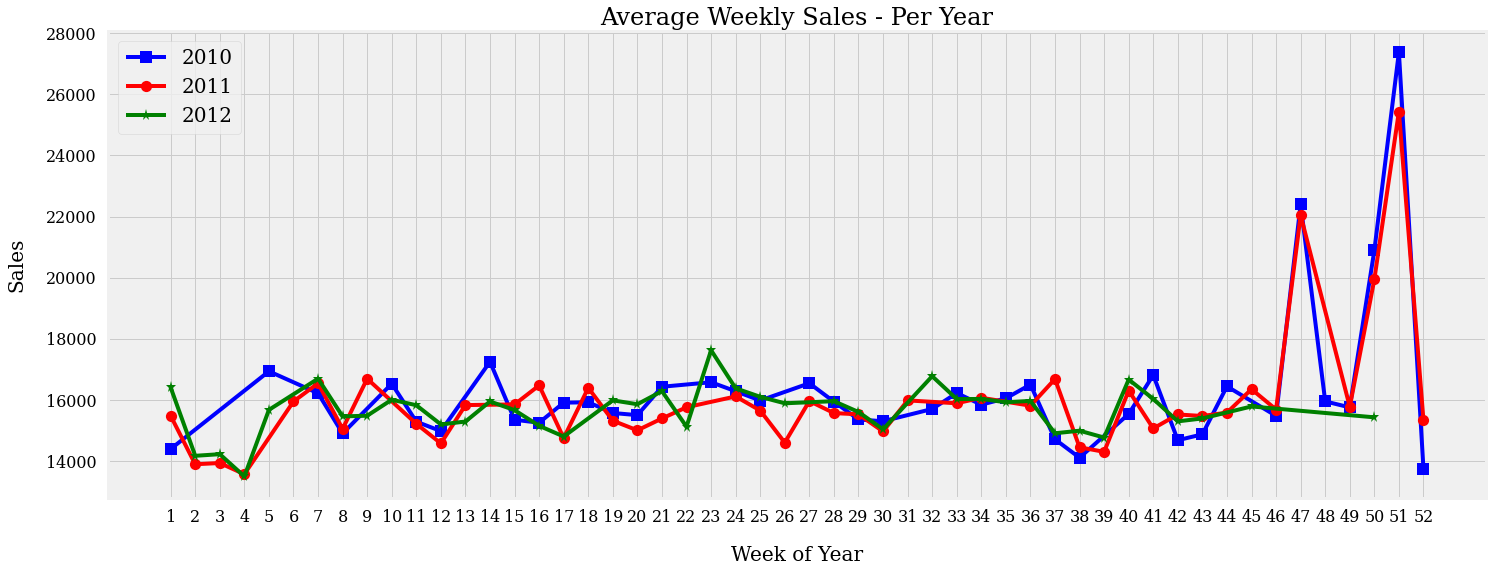

In [21]:
weekly_sales_2010 = merged[merged.Year==2010].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2011 = merged[merged.Year==2011].groupby('WeekOfYear')['Weekly_Sales'].mean()
weekly_sales_2012 = merged[merged.Year==2012].groupby('WeekOfYear')['Weekly_Sales'].mean()




plt.figure(figsize=(22,8))
plt.plot(weekly_sales_2010.index, weekly_sales_2010.values,'s-b')
plt.plot(weekly_sales_2011.index, weekly_sales_2011.values, 'o-r')
plt.plot(weekly_sales_2012.index, weekly_sales_2012.values, '*-g')

plt.xticks(np.arange(1, 53, step=1), fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20)

plt.title("Average Weekly Sales - Per Year", fontsize=24)
plt.legend(['2010', '2011', '2012'], fontsize=20);

Insights:

1.0n weekly basis the week of Thanksgiving holiday and one week before Christmas witnessed the highest sales for the years 2010 and 2011.

2.In 2012 the week no. 23 recorded the highest sales as compared to other weeks of the year but that doesn't correponds to any holiday or any special event

# Average store sales

In [22]:
store_sales = merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

fig = px.bar(store_sales,
             x=store_sales.index,
             y=store_sales.values,
             title="Average Sales - Per Store",
             labels={'x':'Stores', 'y':'Sales'},
             color_discrete_sequence=["#DC143C"], template='plotly_dark')

fig.update_xaxes(tick0=1, dtick=1)

fig.show()


Insights:

1.The sales vary by large amount among the 45 stores

2.lt really depends which category of store it is and which week of the particular year is under consideration

# Average store sales - year wise

In [23]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

store_sales_2010 = merged[merged.Year==2010].groupby('Store')[ 'Weekly_Sales'].mean().to_dict()
store2010_df = pd.DataFrame(list(store_sales_2010.items()), columns=['Store', 'AvgSales2010'])

store_sales_2011 = merged[merged.Year==2011].groupby('Store')[ 'Weekly_Sales'].mean().to_dict()
store2011_df = pd.DataFrame(list(store_sales_2011.items()), columns=['Store', 'AvgSales2011'])
store_sales_2012 = merged[merged.Year==2012].groupby('Store')[ 'Weekly_Sales'].mean().to_dict()
store2012_df = pd.DataFrame(list(store_sales_2012.items()), columns=['Store', 'AvgSales2012'])

fig = make_subplots(rows=3, cols=1, subplot_titles=("Average Store Sales 2010", "Average Store Sales 2011",
                                                    "Average Store Sales 2012"))

fig.add_trace(go.Bar(x=store2010_df.Store, y=store2010_df.AvgSales2010,),1, 1)

fig.add_trace(go.Bar(x=store2011_df.Store, y=store2011_df.AvgSales2011,),2, 1)

fig.add_trace(go.Bar(x=store2012_df.Store, y=store2012_df.AvgSales2012,),3, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False, height=1560)
fig.update_xaxes(title_text="Store", row=1, col=1)

fig.update_xaxes(title_text="Store", row=2, col=1)

fig.update_xaxes(title_text="Store", row=3, col=1)

fig.update_yaxes(title_text="AvgSales", row=1, col=1)

fig.update_yaxes(title_text="AvgSales", row=2, col=1)

fig.update_yaxes(title_text="AvgSales", row=3, col=1)

fig.update_xaxes(tick0=1, dtick=1)
fig.show()

Insights:

1.The overall trend of store sales over the 3 years remain the same as it depends on the type of store and its size

2.The stores 2,4,13,14 and 20 showed the highest sales in all the 3 years

# Average department sales

In [24]:
dept_sales = merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

fig = px.bar(dept_sales,
             x=dept_sales.values,
             y=dept_sales.index,
             template = 'plotly_dark',
             title="Average Sales - Per Department",
             labels={'x':'Sales', 'y':'Dept'},
             color_discrete_sequence=["#DC143C"], orientation='h', height=1200, width=1000)

fig.update_yaxes(tick0=1, dtick=1)

fig.show()

Insights:

Different departments showed different levels of average sales

# Average department sales - per year

In [25]:
dept_sales_2010 = merged[merged.Year==2010].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2010_df = pd.DataFrame(list(dept_sales_2010.items()), columns=['Dept', 'AvgSales2010'])

dept_sales_2011 = merged[merged.Year==2011].groupby( 'Dept')[ 'Weekly_Sales'].mean().to_dict()
dept2011_df = pd.DataFrame(list(dept_sales_2011.items()), columns=['Dept', 'AvgSales2011'])

dept_sales_2012 = merged[merged.Year==2012].groupby('Dept')['Weekly_Sales'].mean().to_dict()
dept2012_df = pd.DataFrame(list(dept_sales_2012.items()), columns=['Dept', 'AvgSales2012'])

fig = make_subplots(rows=1, cols=3, subplot_titles=("Average Dept Sales 2010","Average Dept Sales 2011",
                                                    "Average Dept Sales 2012"))


fig.add_trace(go.Bar(x=dept2010_df.AvgSales2010, y=dept2010_df.Dept, orientation='h',),1, 1)

fig.add_trace(go.Bar(x=dept2011_df.AvgSales2011, y=dept2011_df.Dept, orientation='h',),1, 2)

fig.add_trace(go.Bar(x=dept2012_df.AvgSales2012, y=dept2012_df.Dept, orientation='h',),1, 3)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False, height=1560)

fig.update_xaxes(title_text="AvgSales", row=1, col=1)
fig.update_xaxes(title_text="AvgSales", row=1, col=2)
fig.update_xaxes(title_text="AvgSales", row=1, col=3)

fig.update_yaxes(title_text="Dept", row=1, col=1)
fig.update_yaxes(title_text="Dept", row=1, col=2)
fig.update_yaxes(title_text="Dept", row=1, col=3)

fig.update_yaxes(tick0=1, dtick=1)
fig.show()

Insights:

The sales trend on yearly basis remain the same. Stores with higher sales appeared in all the 3 years while with lower sales showed the same trend in all the 3 years

# Holiday v/s Non holiday sales

In [26]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
holiday_sales = merged.groupby('IsHoliday')[ 'Weekly Sales'].mean()
holiday_counts = merged.IsHoliday.value_counts()

fig = make_subplots(rows=1, cols=2, subplot_titles=("Holidays/Nonholidays Sales", "Holidays/Nonholidays Counts")
                    
fig.add_trace(go.Bar(x=holiday_sales.values, y=holiday_sales.index, orientation='h',),1, 1)
                    
fig.add_trace(go.Bar(x=holiday_counts.values, y=holiday_counts.index, orientation='h',),1, 2)
fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), template='plotly_dark', showlegend=False)

fig.show()

Insights:

Only 7 percent of the weeks in the data are the holiday weeks Despite being the less peecentage of holiday weeks the sales in the holidays week are on the average higher than in the non-holiday weeks

# Relationship: week of year v/s sales

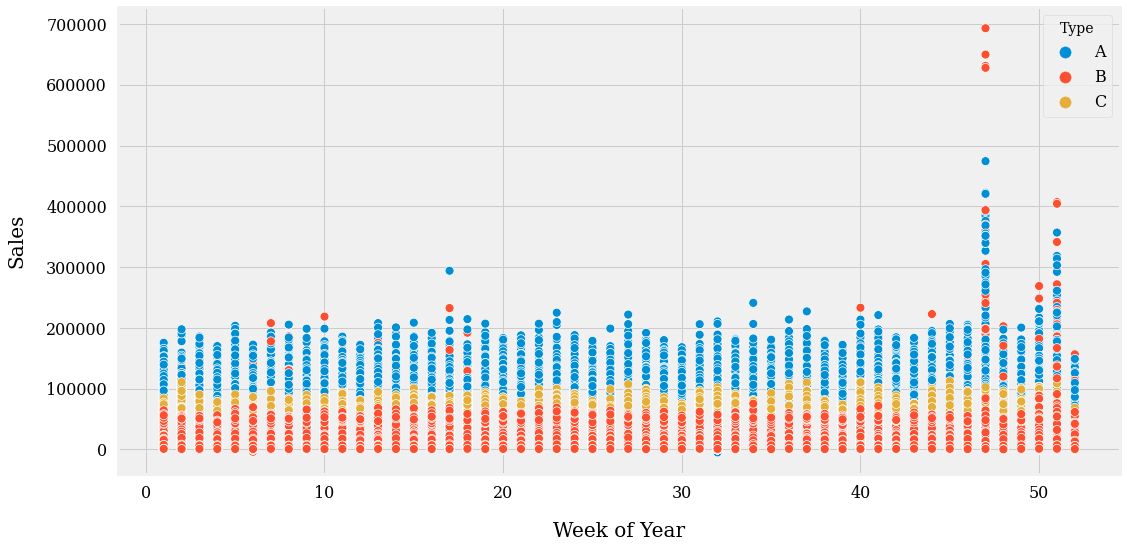

In [28]:
plt.figure(figsize=(16,8))
sns.scatterplot (x=merged.WeekOfYear, y=merged.Weekly_Sales, hue=merged.Type, s=80)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

plt.xlabel('Week of Year', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

This shows only a slight relationship as the weekly sales increased towards the end of the year

# Relationship : size of store v/s sales

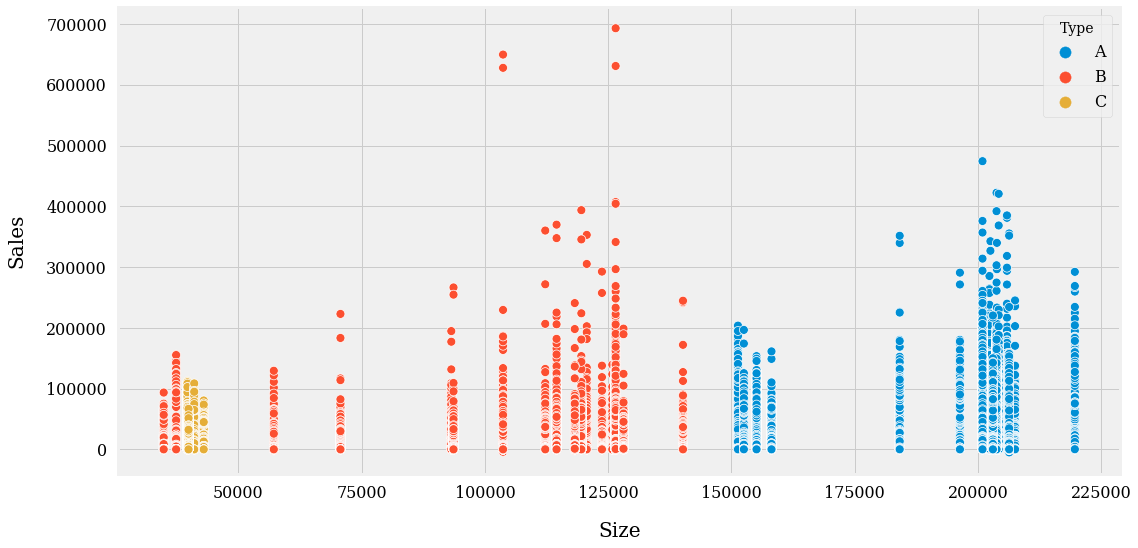

In [29]:
plt.figure(figsize=(16,8))
sns.scatterplot (x=merged.Size, y=merged.Weekly_Sales, hue=merged.Type, s=80)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

plt.xlabel('Size', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

The size of the store shows a linear relationship with the weekly sales. The sales generally increases with increase ofsize of store with some exceptions

# Relationship: temperature v/s sales

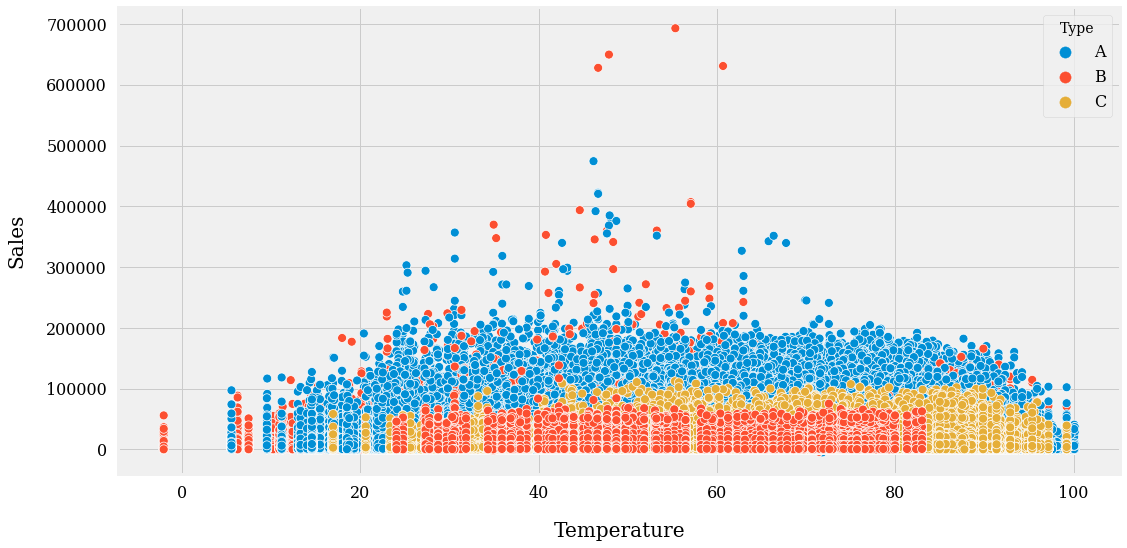

In [30]:
plt.figure(figsize=(16,8))
sns.scatterplot (x=merged.Temperature, y=merged.Weekly_Sales, hue=merged.Type, s=80)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

plt.xlabel('Temperature', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

There seems to be no relatiobship between the temperature in the region and weekly sales of the stores. At low and very high temperatures the sales seems to dip a bit but in general there doesn't exist a clear relationship.

# Relationship: fuel price v/s sales

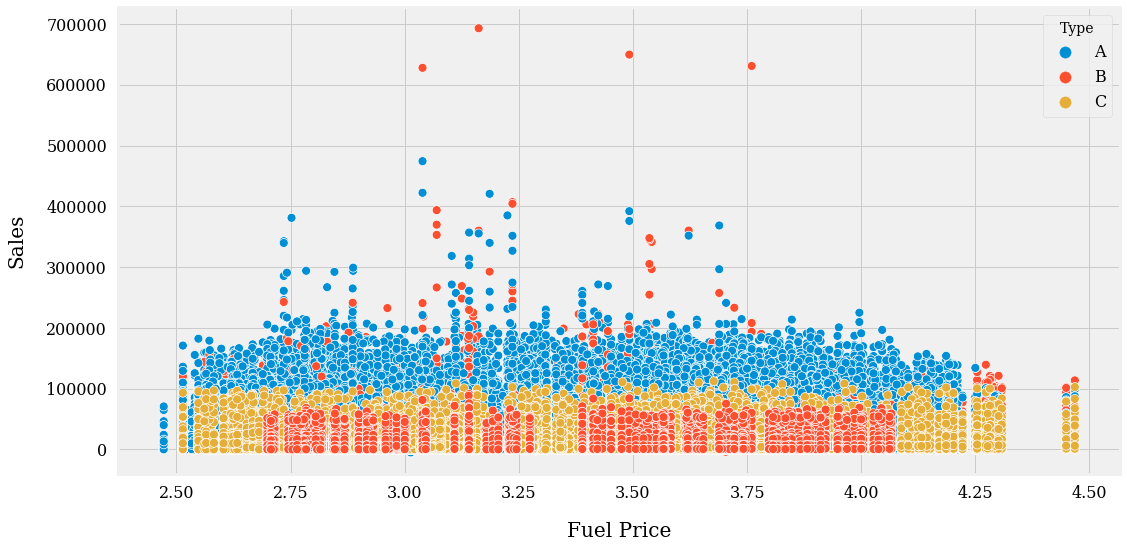

In [31]:
plt.figure(figsize=(16,8))
sns.scatterplot (x=merged.Fuel_Price, y=merged.Weekly_Sales, hue=merged.Type, s=80)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

plt.xlabel('Fuel Price', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights:

Between fuel price and the sales there doesn't seem to exist any clear relationship

# Relationship:CPI v/s sales

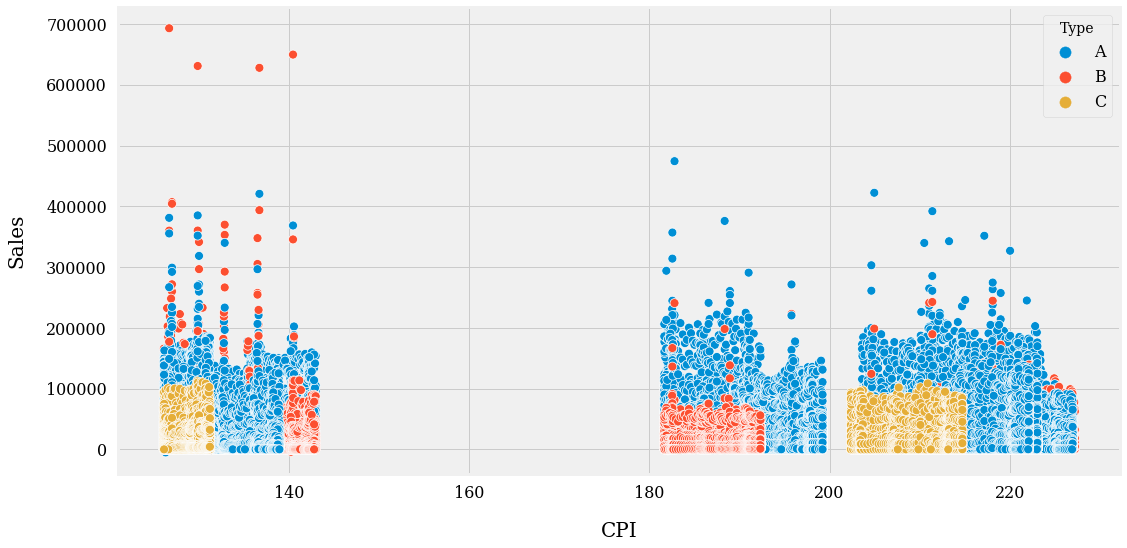

In [32]:
plt.figure(figsize=(16,8))
sns.scatterplot (x=merged.CPI, y=merged.Weekly_Sales, hue=merged.Type, s=80)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

plt.xlabel('CPI', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights

There are 3 clear clusters but there doesn't exist any clear correlation between CPI and weekly sales

# Relationship: unemployment v/s sales

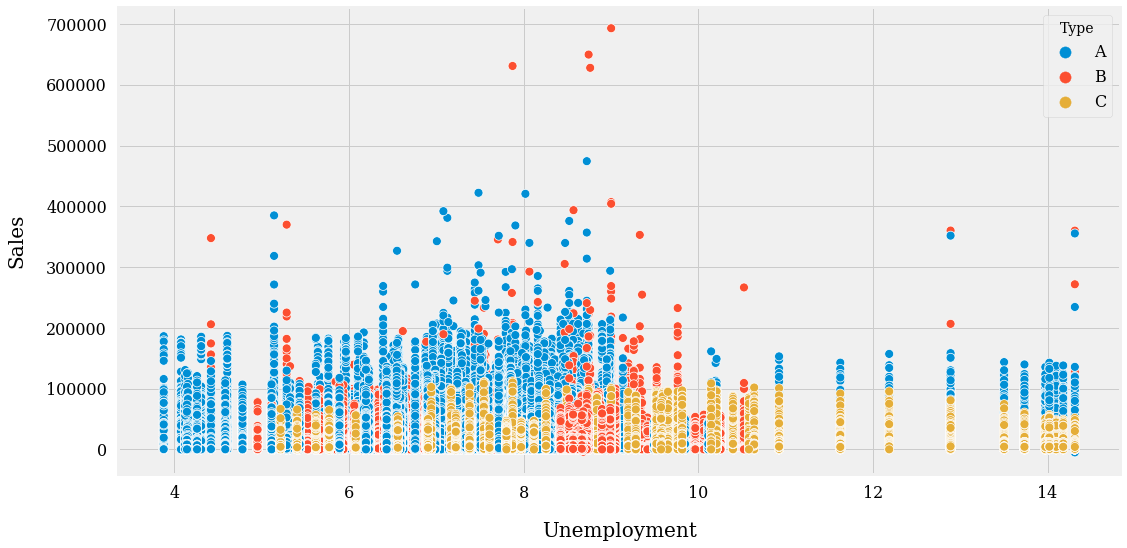

In [33]:
plt.figure(figsize=(16,8))
sns.scatterplot (x=merged.Unemployment, y=merged.Weekly_Sales, hue=merged.Type, s=80)

plt.xticks( fontsize=16)
plt.yticks( fontsize=16)

plt.xlabel('Unemployment', fontsize=20, labelpad=20)
plt.ylabel('Sales', fontsize=20, labelpad=20);

Insights

Also the Unemployment rate doesn't seem to have any effect on the weekly sales

# Correlation Matrix

Lets study the relationship between the different columns numerically to check how they correlate with the weekly sales in order to confirm the inferences we have gathered from the above EDA study. Since the correlation value can only be calculated for the numerical columns, so we will first convert the 'Type' column to numerical values. Type ‘A’, 'B' and 'C' will be mapped to 1, 2 and 3 respectively

In [34]:
storetype_values = {'A':3, 'B':2, 'C':1}
merged['Type_Numeric'] = merged.Type.map(storetype_values)

In [35]:
merged

Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  \
0           1     1 2010-05-02      24924.50      False    A  151315   
1           1     1 2010-12-02      46039.49       True    A  151315   
2           1     1 2010-02-19      41595.55      False    A  151315   
3           1     1 2010-02-26      19403.54      False    A  151315   
4           1     1 2010-05-03      21827.90      False    A  151315   
...       ...   ...        ...           ...        ...  ...     ...   
421565     45    98 2012-09-28        508.37      False    B  118221   
421566     45    98 2012-05-10        628.10      False    B  118221   
421567     45    98 2012-12-10       1061.02      False    B  118221   
421568     45    98 2012-10-19        760.01      False    B  118221   
421569     45    98 2012-10-26       1076.80      False    B  118221   

        Temperature  Fuel_Price  MarkDown1  ...  MarkDown3  MarkDown4  \
0             42.31       2.572        NaN  ...        NaN        NaN   
1             38.51       2.548        NaN  ...        NaN        NaN   
2             39.93       2.514        NaN  ...        NaN        NaN   
3             46.63       2.561        NaN  ...        NaN        NaN   
4             46.50       2.625        NaN  ...        NaN        NaN   
...             ...         ...        ...  ...        ...        ...   
421565        64.88       3.997    4556.61  ...       1.50    1601.01   
421566        64.89       3.985    5046.74  ...      18.82    2253.43   
421567        54.47       4.000    1956.28  ...       7.89     599.32   
421568        56.47       3.969    2004.02  ...       3.18     437.73   
421569        58.85       3.882    4018.91  ...     100.00     211.94   

        MarkDown5         CPI  Unemployment  Year  Month  Day  WeekOfYear  \
0             NaN  211.096358         8.106  2010      5    2        17.0   
1             NaN  211.242170         8.106  2010     12    2        48.0   
2             NaN  211.289143         8.106  2010      2   19         7.0   
3             NaN  211.319643         8.106  2010      2   26         8.0   
4             NaN  211.350143         8.106  2010      5    3        18.0   
...           ...         ...           ...   ...    ...  ...         ...   
421565    3288.25  192.013558         8.684  2012      9   28        39.0   
421566    2340.01  192.170412         8.667  2012      5   10        19.0   
421567    3990.54  192.327265         8.667  2012     12   10        50.0   
421568    1537.49  192.330854         8.667  2012     10   19        42.0   
421569     858.33  192.308899         8.667  2012     10   26        43.0   

        Type_Numeric  
0                  3  
1                  3  
2                  3  
3                  3  
4                  3  
...              ...  
421565             2  
421566             2  
421567             2  
421568             2  
421569             2  

[421570 rows x 21 columns]

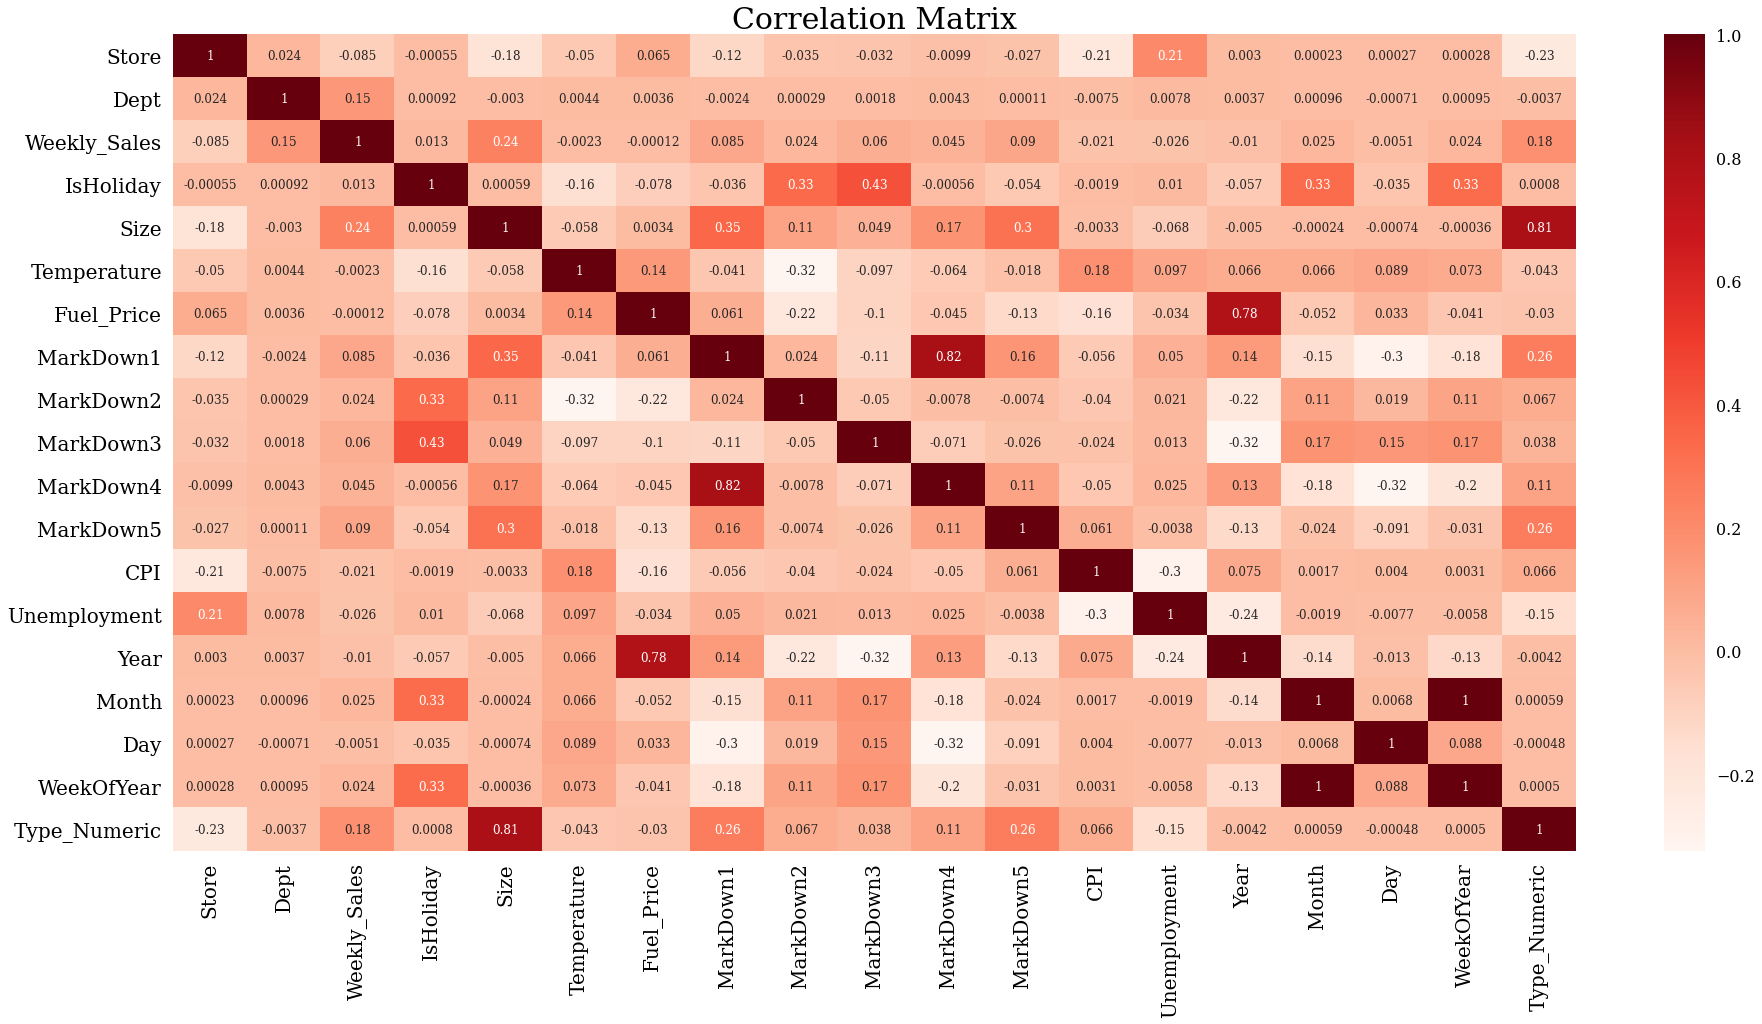

In [36]:
plt.figure(figsize=(28,14))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

sns.heatmap(merged.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

Insights:

1.Department, Store size and Type have moderate correlation with the weekly sales 

2.Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out 

3.Temperature, Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out 

4.IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks 
    
5.We will also leave out Month and Day as this information is already contained in the WeekOfYear


# 3. DATA PREPARATION FOR MODEL TRAINING


Following steps will be performed for preparing the data for the subsequent model training:-

1.Based on the Exploratory Data Analysis and Correlation study, the columns with weak relationship with the target column will be dropped

2.Input and Target dataframes will be created

3.Inputs will be scaled in the 0 to 1 range

4.Training and Validation datasets will be created

5.A function will be defined based on which the models performance will be measured

In [37]:
merged = merged.drop([ 'Date', 'Temperature', 'Fuel_Price', 'Type', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Month', 'Day' ], axis=1)

In [38]:
input_cols = merged.columns.to_list()
input_cols.remove('Weekly_Sales')
target_col = 'Weekly_Sales'

inputs_df = merged[input_cols].copy()
targets = merged[target_col].copy()

In [39]:
input_cols

['Store', 'Dept', 'IsHoliday', 'Size', 'Year', 'WeekOfYear', 'Type_Numeric']

In [40]:
inputs_df

Store  Dept  IsHoliday    Size  Year  WeekOfYear  Type_Numeric
0           1     1      False  151315  2010        17.0             3
1           1     1       True  151315  2010        48.0             3
2           1     1      False  151315  2010         7.0             3
3           1     1      False  151315  2010         8.0             3
4           1     1      False  151315  2010        18.0             3
...       ...   ...        ...     ...   ...         ...           ...
421565     45    98      False  118221  2012        39.0             2
421566     45    98      False  118221  2012        19.0             2
421567     45    98      False  118221  2012        50.0             2
421568     45    98      False  118221  2012        42.0             2
421569     45    98      False  118221  2012        43.0             2

[421570 rows x 7 columns]

In [41]:
targets

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(merged[input_cols])

inputs_df[input_cols] = scaler.transform(inputs_df[input_cols])

In [43]:
#Create training and validation sets

from sklearn.model_selection import train_test_split

train_inputs, val_inputs, train_targets, val_targets = train_test_split(
                      inputs_df, targets, test_size=0.3, random_state=42)

The competition is evaluated on the weighted mean absolute error(WMAE), so we will define a function which calculates this error for the evaluation of machine learning models

In [44]:
def WMAE(df, targets, predictions):
    weights = df.IsHoliday.apply(lambda x: 5 if x else 1)
    return np.round(np.sum(weights*abs(targets-predictions))/(np.sum(weights)), 2)

# 4. MODEL BUILDING

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression().fit(train_inputs, train_targets)

# Generate predictions on training data
train_preds = model.predict(train_inputs)

In [46]:
# Compute WMAE on traing data
train_wmae = WMAE(train_inputs, train_targets, train_preds)
print('The WMAE loss for the training set is {}.'.format(train_wmae))

# Generate predictions on validation data
val_preds = model.predict(val_inputs)

# Compute WMAE on validation data
val_wmae = WMAE(val_inputs, val_targets, val_preds)
print('The WMAE loss for the validation set is {}.'.format(val_wmae))


The WMAE loss for the training set is 14779.47.
The WMAE loss for the validation set is 14886.67.


# Gradient boosting machine

In [47]:
!pip install xgboost lightgbm --upgrade --quiet

In [48]:
from xgboost import XGBRegressor

# Create the model
gbm = XGBRegressor(random_state=42, n_jobs=-1)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data

gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is {}.'.format(gbm_train_wmae))
gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data

gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is 3155.21.
The WMAE loss for the validation set is 3260.67.


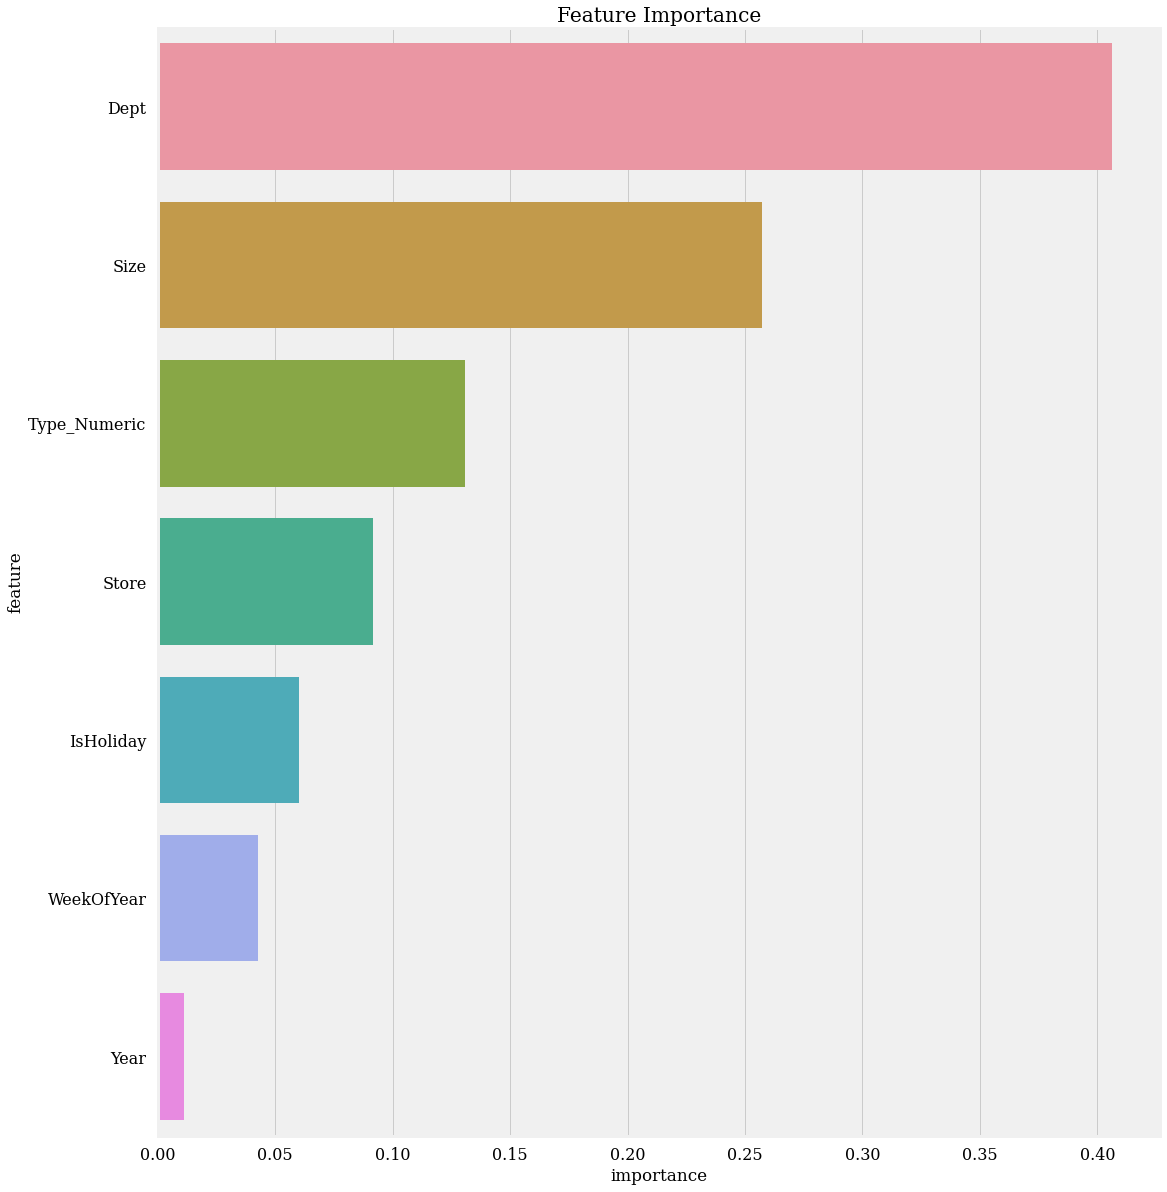

In [49]:
importance_df = pd.DataFrame({
       'feature': train_inputs.columns,
       'importance': gbm.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(16,19))
plt.title('Feature Importance')

sns.barplot(data=importance_df, x='importance', y='feature');

Insights:

For the Gradient Boosting Machine, the Department, Store Size and Store Type are the major contributing features

This differs little bit from Decision Trees and Random Forests as in this case the Store Type has higher importance than the Store Number

# Tuning of model parameters

Let's define two functions like before which assist the tuning of hyper parameters.

'test_params_xgb' takes the parameters of Random Forest and train the model. After that it make predictions on the training and validation and return weighted mean averaged error for the traing and validation data.

‘test_param_and_plot_xgb' takes the parameter name and the range of values to be tested. For these values 'test_params' is called inside the funtion to train and evaluate the model. Finally the training and validation errors are plotted against the tested values.

In [50]:
def test_params_xgb(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_wmae = WMAE(train_inputs, train_targets, model.predict(train_inputs))
    val_wmae = WMAE(val_inputs, val_targets, model.predict(val_inputs))
    return train_wmae, val_wmae

In [51]:
def test_param_and_plot_xgb(param_name, param_values):
    train_errors, val_errors = [], []

    for value in param_values:

        params = {param_name: value}
        train_wmae, val_wmae = test_params_xgb(**params)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)

    plt.figure(figsize=(16,8))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('WMAE')
    plt.legend([ 'Training', 'Validation'])


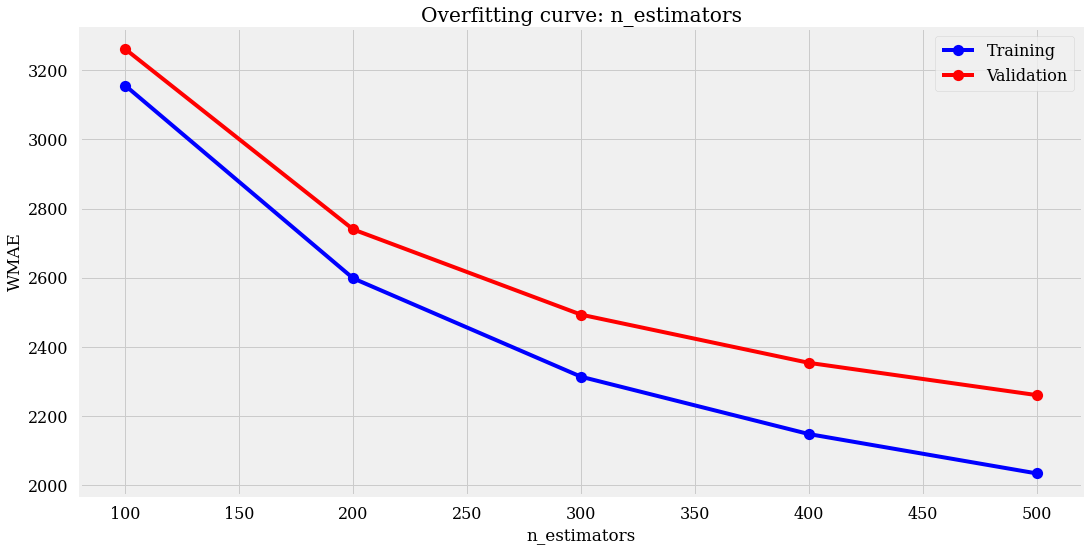

In [52]:
test_param_and_plot_xgb('n_estimators', [100, 200, 300, 400, 500])

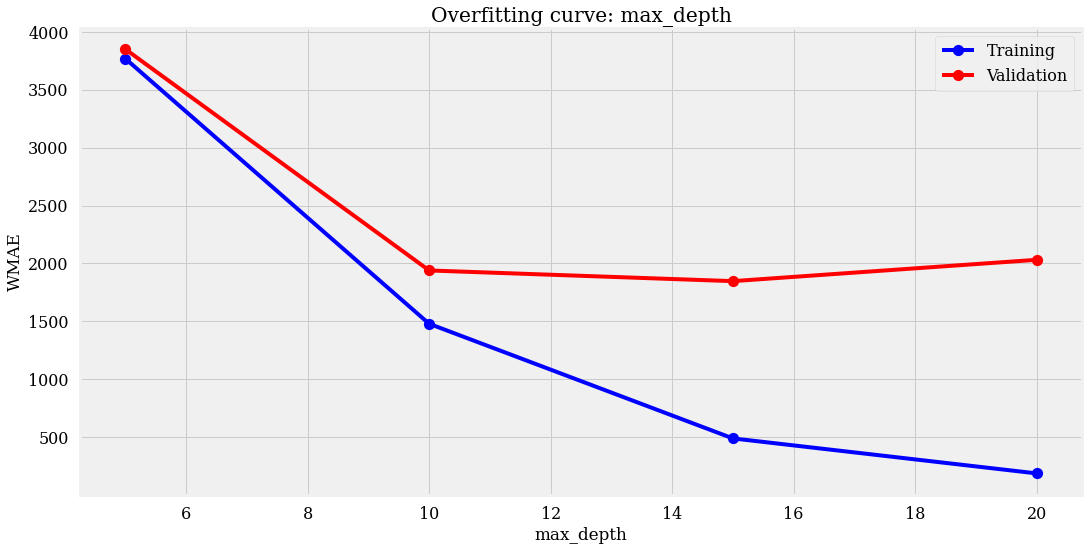

In [53]:
test_param_and_plot_xgb('max_depth', [5, 10, 15, 20])

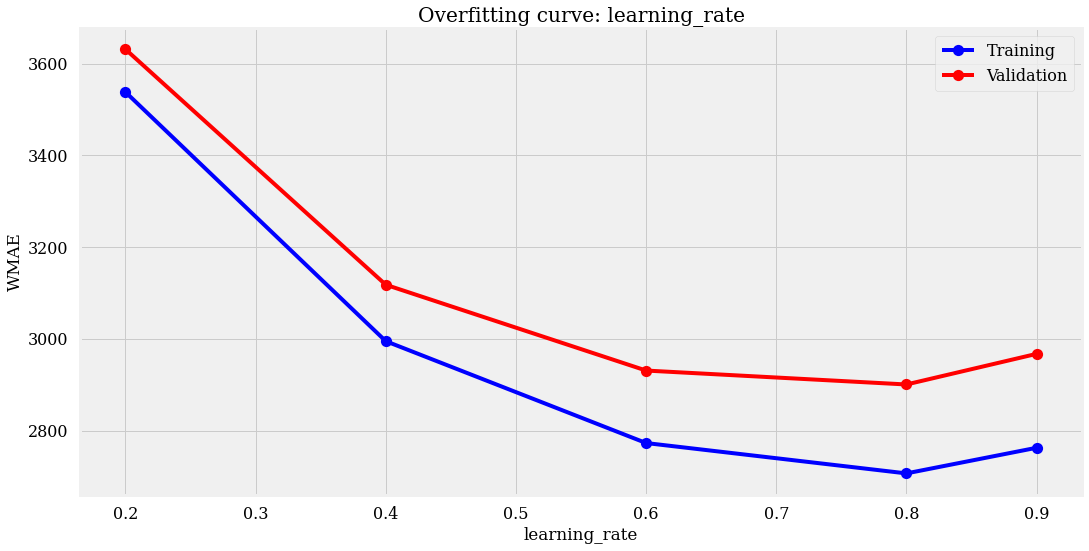

In [66]:
test_param_and_plot_xgb('learning_rate', [0.2, 0.4, 0.6, 0.8, 0.9])

From the above testing of parameters, the follwoing values of parameters were found to be the best which minimizes the validation error.

max_depth: 20

n_estimators: 500

learning_rate: 0.8

These parameters are varied one at a time but they both are inter related. These parameters are then varied simultaneouslyfurther fine tuning of the model by making some educated guesses and the best combination of values which minimizes the validation error are as follows:

max_depth: 15

In [54]:
from xgboost import XGBRegressor

# Create the model

gbm = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=0.35)

# Fit the model
gbm.fit(train_inputs, train_targets)

gbm_train_preds = gbm.predict(train_inputs)

# Compute WMAE on traing data

gbm_train_wmae = WMAE(train_inputs, train_targets, gbm_train_preds)
print('The WMAE loss for the training set is {}.'.format(gbm_train_wmae))
gbm_val_preds = gbm.predict(val_inputs)

# Compute WMAE on validation data

gbm_val_wmae = WMAE(val_inputs, val_targets, gbm_val_preds)
print('The WMAE loss for the validation set is {}.'.format(gbm_val_wmae))

The WMAE loss for the training set is 191.51.
The WMAE loss for the validation set is 1931.74.


# Model Comparison

Linear Regression

1.The WMAE loss for the training set is 14723.37.

2.The WMAE loss for the validation set is 14932.3.

Gradient Boosting Machine

1.The WMAE loss for the training set is 197.12.

2.The WMAE loss for the validation set is 1938.33.

# Accuracy of Gradient Boosting Model on Test data

In [55]:
gbm_score = gbm.score(val_inputs, val_targets)
print("Accuracy: ", gbm_score)

Accuracy:  0.9590933251640698


# Final Predictions using Gradient Boosting Model

In [56]:
ls=[]
for val in merged.columns:
    ls.append(val)
ls.remove('Weekly_Sales')

final_input= merged[ls]
final_target= merged[ 'Weekly_Sales']

gbmf = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=400, max_depth=15, learning_rate=86.35)

#Fit the model
gbmf.fit(final_input, final_target)

final_preds= gbmf.predict(final_input)

In [60]:
gbm_score = gbmf.score(final_input, final_target)
print("Accuracy: ", gbm_score)


Accuracy:  0.9936273511119837

# 5. INFERENCES AND CONCLUSIONS

Following inferences and conclusions can be drawn from the the analysis of the data:

1.Type 'A’ stores are more popular than 'B' and 'C' types

2.Type 'A’ stores outclass the 'B' and 'C' types in terms of size and the avergae weekly sales

3.Weekly Sales are effected by the week of year. Holiday weeks witnessed more sales than the non-holiday weeks. Notables are Thanksgiving and Christmas weeks

4.Size of the store is a major contributing factor in the weekly sales

5.Sales are also dependent on the department of the store as different departments showed different levels of weekly sales

6.Among the trained models for predicting the future sales, Grdient Boosting Machine with tuned hyperparameters performs the best